In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## life cycle of this project 
    1. loading data 
    2. cleaning data
    3. removing null values
    4. feature engineering 
    5. feature selection 
    6. model selection 
    7. tunning the model 
    8. final resulte

In [2]:
# loading data set
dfs = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
dfs_demo=dfs
dfs_demo

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dfs.head(15)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [5]:
dfs= dfs.iloc[: , 1:]

In [6]:
dfs.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [8]:
# get unique values of all categerical features
print('Gender',dfs['gender'].unique())
print('ssc_b',dfs['ssc_b'].unique())
print('hsc_b',dfs['hsc_b'].unique())
print('hsc_s',dfs['hsc_s'].unique())
print('degree_t',dfs['degree_t'].unique())
print('specialisation',dfs['specialisation'].unique())
print('status',dfs['status'].unique())

Gender ['M' 'F']
ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


In [9]:
dfs.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
# changing categeorical feature in form of numbers
GENDER=pd.get_dummies(data=dfs['gender'],drop_first = True)
SSC_B=pd.get_dummies(data=dfs['ssc_b'],drop_first = True)
HSC_B=pd.get_dummies(data=dfs['hsc_b'],drop_first = True)
HSC_S=pd.get_dummies(data=dfs['hsc_s'],drop_first = True)
DEGREE_T=pd.get_dummies(data=dfs['degree_t'],drop_first = True)
SPECIALISATION=pd.get_dummies(data=dfs['specialisation'],drop_first = True)
STATUS=pd.get_dummies(data=dfs['status'],drop_first = True)

# show dummiES
print(SSC_B)
print(HSC_B)
print(HSC_S)
print(DEGREE_T)
print(SPECIALISATION)
print(STATUS)

In [12]:
dfs_final=pd.concat([dfs,GENDER,SSC_B,HSC_B,HSC_S,DEGREE_T,SPECIALISATION,STATUS],axis=1)

In [13]:
dfs_final

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,salary,M,Others,Others,Commerce,Science,Others,Sci&Tech,Mkt&HR,Placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,...,270000.0,1,1,1,1,0,0,1,1,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,...,200000.0,1,0,1,0,1,0,1,0,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,...,250000.0,1,0,0,0,0,0,0,0,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,...,NaN,1,0,0,0,1,0,1,1,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,...,425000.0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,...,400000.0,1,1,1,1,0,0,0,0,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,...,275000.0,1,1,1,0,1,0,1,0,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,...,295000.0,1,1,1,1,0,0,0,0,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,...,204000.0,0,1,1,1,0,0,0,1,1


In [14]:
dfs_final.columns


Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'M', 'Others', 'Others', 'Commerce', 'Science', 'Others',
       'Sci&Tech', 'Mkt&HR', 'Placed'],
      dtype='object')

In [15]:
dfs_final.drop(['gender','ssc_b','hsc_s','hsc_b','degree_t', 'workex','specialisation','status', ],axis=1,inplace=True)

In [16]:
#Drop Dep_Time
dfs_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssc_p     215 non-null    float64
 1   hsc_p     215 non-null    float64
 2   degree_p  215 non-null    float64
 3   etest_p   215 non-null    float64
 4   mba_p     215 non-null    float64
 5   salary    148 non-null    float64
 6   M         215 non-null    uint8  
 7   Others    215 non-null    uint8  
 8   Others    215 non-null    uint8  
 9   Commerce  215 non-null    uint8  
 10  Science   215 non-null    uint8  
 11  Others    215 non-null    uint8  
 12  Sci&Tech  215 non-null    uint8  
 13  Mkt&HR    215 non-null    uint8  
 14  Placed    215 non-null    uint8  
dtypes: float64(6), uint8(9)
memory usage: 12.1 KB


In [17]:
dfs_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssc_p     215 non-null    float64
 1   hsc_p     215 non-null    float64
 2   degree_p  215 non-null    float64
 3   etest_p   215 non-null    float64
 4   mba_p     215 non-null    float64
 5   salary    148 non-null    float64
 6   M         215 non-null    uint8  
 7   Others    215 non-null    uint8  
 8   Others    215 non-null    uint8  
 9   Commerce  215 non-null    uint8  
 10  Science   215 non-null    uint8  
 11  Others    215 non-null    uint8  
 12  Sci&Tech  215 non-null    uint8  
 13  Mkt&HR    215 non-null    uint8  
 14  Placed    215 non-null    uint8  
dtypes: float64(6), uint8(9)
memory usage: 12.1 KB


In [18]:
dfs_final.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,M,Others,Others,Commerce,Science,Others,Sci&Tech,Mkt&HR,Placed
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330,-0.068969,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,-0.172536,0.607889
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819,-0.021334,-0.137013,-0.019548,0.258093,-0.226675,-0.131382,-0.053599,-0.241630,0.491228
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272,-0.173217,0.038070,0.067229,-0.022724,0.092006,-0.180408,0.123477,-0.218286,0.479861
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307,0.084294,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,-0.236315,0.127639
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013,-0.300531,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,-0.105728,0.076922
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000,0.158912,0.005539,-0.007549,-0.014219,0.049547,-0.016573,0.172492,-0.146576,NaN
M,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,0.158912,1.000000,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,-0.106160,0.090670
Others,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.005539,0.019429,1.000000,0.605883,-0.056671,0.058505,-0.002758,0.101060,-0.051565,0.037297
Others,0.066996,-0.019548,0.067229,0.039108,0.090201,-0.007549,0.065945,0.605883,1.000000,-0.073522,0.126446,-0.116920,0.086548,0.002232,0.016945
Commerce,-0.101323,0.258093,-0.022724,-0.021732,-0.049415,-0.014219,-0.001087,-0.056671,-0.073522,1.000000,-0.901673,-0.202135,-0.584673,-0.129985,0.024414


<AxesSubplot:xlabel='salary'>

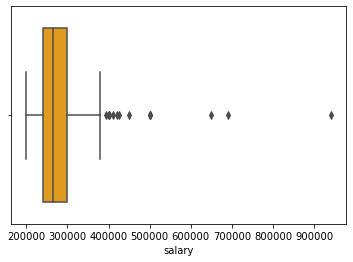

In [19]:
sns.boxplot(x=dfs_final['salary'],hue=dfs_final['Placed'],color='orange')

<AxesSubplot:xlabel='salary'>

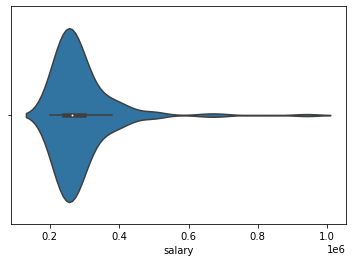

In [20]:
sns.violinplot(x=dfs_final['salary'])

In [21]:
dfs=dfs_final.drop(['salary'],axis=1)
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssc_p     215 non-null    float64
 1   hsc_p     215 non-null    float64
 2   degree_p  215 non-null    float64
 3   etest_p   215 non-null    float64
 4   mba_p     215 non-null    float64
 5   M         215 non-null    uint8  
 6   Others    215 non-null    uint8  
 7   Others    215 non-null    uint8  
 8   Commerce  215 non-null    uint8  
 9   Science   215 non-null    uint8  
 10  Others    215 non-null    uint8  
 11  Sci&Tech  215 non-null    uint8  
 12  Mkt&HR    215 non-null    uint8  
 13  Placed    215 non-null    uint8  
dtypes: float64(5), uint8(9)
memory usage: 10.4 KB


In [22]:
dfs_final['M']=dfs_final['M'].astype(int)


In [24]:
dfs_final['Others']=dfs_final['Others'].astype(int)

In [51]:
dfs_final['Placed']=dfs_final['Placed'].astype(int)

In [25]:
dfs_demo

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [37]:
# finding where salary of  not placed student is possiable
dfs_demo[dfs_demo['status']=='Not Placed'].count()

sl_no             67
gender            67
ssc_p             67
ssc_b             67
hsc_p             67
hsc_b             67
hsc_s             67
degree_p          67
degree_t          67
workex            67
etest_p           67
specialisation    67
mba_p             67
status            67
salary             0
dtype: int64

In [38]:
dfs_demo[dfs_demo['status']=='Not Placed']

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [39]:
#dfs_demo[dfs_demo[['status']!='Not Placed' or ['salary']=='NaN']]

<AxesSubplot:xlabel='status', ylabel='count'>

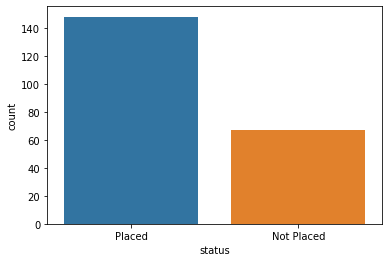

In [44]:
sns.countplot(x=dfs_demo['status'])

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

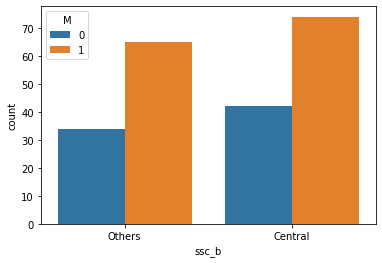

In [47]:
sns.countplot(x=dfs_demo['ssc_b'],hue=dfs_final['M'])

<AxesSubplot:xlabel='degree_t', ylabel='count'>

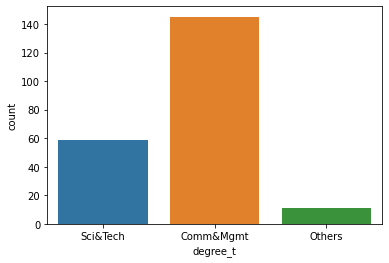

In [48]:
sns.countplot(x=dfs_demo['degree_t'])

<AxesSubplot:xlabel='degree_t', ylabel='count'>

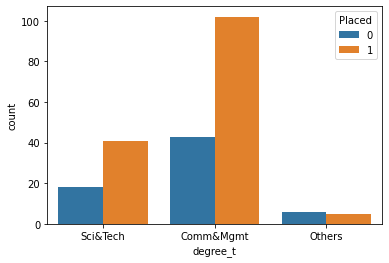

In [52]:
sns.countplot(x=dfs_demo['degree_t'],hue=dfs_final['Placed'])